<h1 style='color:black;font-size:30px;text-align:center'> Introduction</h1>

Spam detection is the process of detecting the spam or fake messages from our email. For this application, I have use deep learning technique and Google bert transformer to find whether our email contains spam or not. For validation purpose, I have used few messages from my email to identify or test whether my model is working properly or not. The dataset which I have used in this notebook is Kaggle Email spam dataset.  




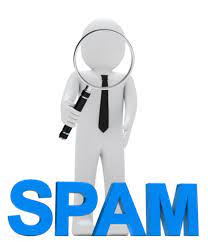


Note: Although I have validate this model with my spam or not spam email and also giving excellent accuracy, but, I request others not to deploy this model for their personal product because this dataset is small in size however you can use this method for building new model in large dataset and also you can gain a huge knowledge how to play with bert.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Email_spam.csv',encoding = 'ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


There are five feature where only two are useful to build my model so I am going to drop last three features name as Unamed:2, Unamed:3, Unamed:4

In [5]:
df.drop(df.iloc[:,2:],inplace=True,axis=1)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [9]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


To count the number of spam or not spam message in our dataset we use this technique

In [10]:
print('The total number of spam and not spam message in our dataset is\n',df['label'].value_counts())

The total number of spam and not spam message in our dataset is
 ham     4825
spam     747
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

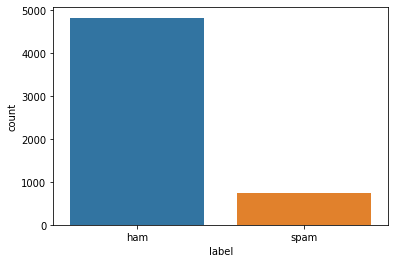

In [11]:
import seaborn as sns
sns.countplot(df['label'])

Well, The main reason to use ktrain is that ktrain comes with integrated bert function which makes our work more easier to build our model. Moreover, ktrain is a lightweight wrapper library for TensorFlow Keras. It can be very helpful in building projects consisting of neural networks. Using this wrapper, we can build, train and deploy deep learning and machine learning models.

In [12]:
import tensorflow as tf
import ktrain
from ktrain import text

Here, I am splitting my dataset for training and testing purpose, wheree 90% of data are used in training purpose where onyly 10% of data from the
same dataset is apply for testing the model.

In [13]:
split=int(len(df)*0.90)
train_data=df.iloc[:split,:]
test_data=df.iloc[split:,:]

In [14]:
train_data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5009,ham,"By the way, 'rencontre' is to meet again. Moun..."
5010,spam,You have WON a guaranteed å£1000 cash or a å£2...
5011,ham,U attend ur driving lesson how many times a wk...
5012,ham,"Uncle G, just checking up on you. Do have a re..."


<h1 style="color:black;font-size:30px;text-align:center"> Lets fine tune our BERT model</h1>

text_from_df ktrain perform preprocessing of data from dataframe and will return five variables out of it these variables are (x_train,y_train)(x_test,y_test) and preprocess. The arguments inside text_from_df are: train_df is the dataset that are used for training the model, text_column is  text column present in dataframe, label_columns is our traget/output column present in the dataset. maxlen maximum length of word that can be present inside a sentence in case of BERT we can taken maximum length of 512 if we will take sentence length beyond 512 it will give error,however our dataset is small so I have used only maxlen as 400. preprocess_mode this says how the preprocessing has been done, in my case i have preprocessed the textual data using BERT.

In [15]:
(X_train,y_train),(X_test,y_test),preprocess=text.texts_from_df(train_df=train_data,
                text_column='message',label_columns='label',
                   val_df=test_data,maxlen=300,preprocess_mode='bert')

['ham', 'spam']
   ham  spam
0  1.0   0.0
1  1.0   0.0
2  0.0   1.0
3  1.0   0.0
4  1.0   0.0
['ham', 'spam']
      ham  spam
5014  1.0   0.0
5015  1.0   0.0
5016  0.0   1.0
5017  1.0   0.0
5018  1.0   0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [16]:
X_train[0].shape

(5014, 300)

In [17]:
X_train[0].ndim

2

In [18]:
X_train

[array([[ 101, 2175, 2127, ...,    0,    0,    0],
        [ 101, 7929, 2474, ...,    0,    0,    0],
        [ 101, 2489, 4443, ...,    0,    0,    0],
        ...,
        [ 101, 1057, 5463, ...,    0,    0,    0],
        [ 101, 4470, 1043, ...,    0,    0,    0],
        [ 101, 7592, 2879, ...,    0,    0,    0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In order to create bert model we use text_classifier with the help of keras ktrain library

In [19]:
model=text.text_classifier(name='bert',train_data=(X_train,y_train),preproc=preprocess,metrics=['accuracy'])

Is Multi-Label? False
maxlen is 300
done.


Now, we will use get_learner which will wrap the model and data and helps us to used for final prediction of result.

In [20]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 300)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 300)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 300, 768),  23440896    ['Input-Token[0][0]']            
 g)                              (30522, 768)]                                                    
                                                                                                  
 Embedding-Segment (Embedding)  (None, 300, 768)     1536        ['Input-Segment[0][0]']    

In [27]:
learner=ktrain.get_learner(model=model,train_data=(X_train,y_train),val_data=(X_test,y_test),batch_size=1)

<h6 style="color:black;font-size:30px;text-align:center">How to find good learning rate?</h6>
Here, giving learning rate and epochs are hypermeter so choose wisely in order to get better accuracy



learner.lr_find() ->  find optimal learning rate

learner.lr_plot() -> visually identify best learning rate

so look this document  https://github.com/amaiya/ktrain to know more about the ktrain library

In [28]:
# learner.lr_find()
# learner.lr_plot()

In [29]:
 learner.fit_onecycle(lr=1e-3,epochs=1)



begin training using onecycle policy with max lr of 0.001...
5014/5014 [==============================] - 1126s 223ms/step - loss: 0.4758 - accuracy: 0.8492 - val_loss: 0.3886 - val_accuracy: 0.8710


 In order to predict the new unlabeled data we can use get_predictor method in ktrain library

In [30]:
predictor=ktrain.get_predictor(learner.model,preprocess)

In [38]:
new_message=['CONGRATULATIONS! You are the lucky online winner of a brand new Sweepstakes Craftsman Tool Shed entry!',
         
                  'Thank you again for your interest in the Associate Data Scientist position in our company, and for your cooperation in the interview process so far',
             
              ' Fidelity Life - $250K in life insurance for as low as $15 a month! No Exam Option available',
              ]

In [39]:
predictor.predict(new_message)

['ham', 'ham', 'ham']

<h1 style="color:black;font-size:30px;text-align:center"> Conclusion </h1>

The model is not predicting that much correct while giving external messages due to less number of data and I am getting contiously out of memory problem although I am using 4gb graphics card so I have used only 1 batch_size. However if you want to see the my kaggle where my model is predicting the external data amazingly then click here <a href="https://www.kaggle.com/code/bishowlamsal/spam-detector-using-bert"> Kaggle</a>

Lets save our model so that it can be use for deploy in application

In [40]:
predictor.save('bert_model')